In [28]:
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd
import matplotlib
from sklearn.datasets import load_iris
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [29]:
# import some data to play with
iris = load_iris()
# Take the first two features. We could avoid this by using a two-dim dataset
X = iris.data[:, :2]
y = iris.target
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=5)

# we create an instance of SVM and fit out data. We do not scale our
# data since we want to plot the support vectors
C = 1.0  # SVM regularization parameter
models = SVC(kernel='linear', C=C)
models.fit(X_train, Y_train)
y_test_predict = models.predict(X_test)

y_test_predict = models.predict(X_test)
print('accuracy: %.2f' % accuracy_score(Y_test, y_test_predict)) 
             

accuracy: 0.83


In [39]:
#rbf
C = 1.0  # SVM regularization parameter
models = SVC(kernel='rbf', C=C)
models.fit(X_train, Y_train)
y_test_predict = models.predict(X_test)

y_test_predict = models.predict(X_test)
print('accuracy: %.2f' % accuracy_score(Y_test, y_test_predict)) 

accuracy: 0.87


In [7]:
#poly
C = 1.0  # SVM regularization parameter
models = SVC(kernel='poly', C=C)
models.fit(X_train, Y_train)
y_test_predict = models.predict(X_test)

y_test_predict = models.predict(X_test)
print('accuracy: %.2f' % accuracy_score(Y_test, y_test_predict)) 

accuracy: 0.77


In [ ]:
def plot_svc_decision_function(model, ax=None, plot_support=True):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    # plot decision boundary and margins
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    
    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

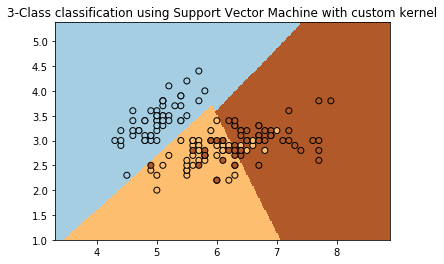

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, svm
iris = datasets.load_iris()
X = iris.data[:, :2]  # we only take the first two features. We could
                      # avoid this ugly slicing by using a two-dim dataset
Y = iris.target


def my_kernel(X, Y):
    """
    We create a custom kernel:

                 (2  0)
    k(X, Y) = X  (    ) Y.T
                 (0  1)
    """
    M = np.array([[2, 0], [0, 1.0]])
    return np.dot(np.dot(X, M), Y.T)


h = .02  # step size in the mesh

# we create an instance of SVM and fit out data.
clf = svm.SVC(kernel=my_kernel)
clf.fit(X, Y)

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=plt.cm.Paired, edgecolors='k')
plt.title('3-Class classification using Support Vector Machine with custom'
          ' kernel')
plt.axis('tight')
plt.show()